## Observations and Insights

## Dependencies and starter code

In [344]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [345]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=[]
median=[]
variance=[]
st_dev=[]
SEM=[]

regimen_list=df['Drug Regimen'].unique()
for regimen in regimen_list: 
    df_regimen = df.loc[df['Drug Regimen']==regimen]
    
    mean.append(df_regimen['Tumor Volume (mm3)'].mean())
    median.append(df_regimen['Tumor Volume (mm3)'].median())
    variance.append(st.tvar(df_regimen['Tumor Volume (mm3)']))
    st_dev.append(st.tstd(df_regimen['Tumor Volume (mm3)']))
    SEM.append(st.sem(df_regimen['Tumor Volume (mm3)']))
    
df_stats=pd.DataFrame(
    {"Drug Regimen": regimen_list,
     "Mean vol": mean,
     "Median vol": median,
     "Variance of vol": variance,
     "StDev of vol": st_dev,
     "SEM of vol": SEM
    })

df_stats.set_index('Drug Regimen')
 

,Mean vol,Median vol,Variance of vol,StDev of vol,SEM of vol
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884


## Bar plots

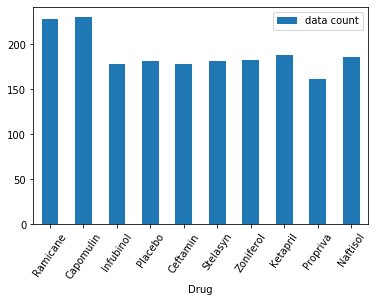

In [346]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points=[]
for regimen in regimen_list: 
    df_regimen = df.loc[df['Drug Regimen']==regimen]
    data_points.append(len(df_regimen))
    
x_axis=[]
for i in range(len(data_points)):
    x_axis.append(i)


bar_plot = pd.DataFrame({'Drug':regimen_list, 'data count':data_points})
ax = bar_plot.plot.bar(x='Drug', y='data count', rot=55)

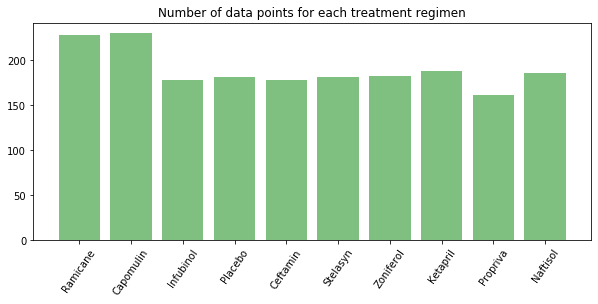

In [347]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(10,4))
plt.bar(x_axis, data_points, color='g', alpha=0.5, align="center")
plt.xticks(x_axis, regimen_list, rotation=55)
plt.title("Number of data points for each treatment regimen")
plt.show()

## Pie plots

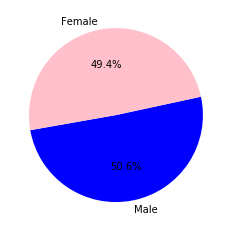

In [348]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["blue", "pink"]
genders = ["Male", "Female"]
gender_count=[]
for gender in genders:
    df_genders = df.loc[df['Sex']==gender]
    gender_count.append(len(df_genders))
gender_count

df_gender = pd.DataFrame({'': gender_count},
                         index=genders)
plot = df_gender.plot.pie(y='', figsize=(4, 4), colors=colors,  startangle=190,
        autopct="%1.1f%%", legend=False)

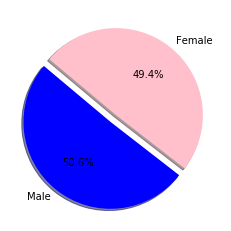

In [349]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "pink"]
explode = (0.1, 0)
plt.pie(gender_count, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, outliers and boxplots

In [350]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
promising_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 
mice = df["Mouse ID"].unique()

mouse_ID=[]
vol_final=[]
treatment=[]



for regimen in promising_regimen: 
        df_promising_regimen = df.loc[df['Drug Regimen']==regimen]
        for mouse in mice:
            df_mouse = df_promising_regimen.loc[df_promising_regimen['Mouse ID']==mouse]
            if len(df_mouse) != 0:
                mouse_ID.append(mouse)
                treatment.append(regimen)
                vol_final.append(df_mouse.reset_index()["Tumor Volume (mm3)"][len(df_mouse)-1])

    

df_vol_final=pd.DataFrame(
    {"Mouse ID": mouse_ID,
     "Drug Regimen": treatment,
     "Final Tumor Volume (mm3)": vol_final
    }).sort_values(by=["Final Tumor Volume (mm3)"])

df_vol_final.head()



,Mouse ID,Drug Regimen,Final Tumor Volume (mm3)
25,k403,Ramicane,22.050126
0,s185,Capomulin,23.343598
2,m601,Capomulin,28.430964
1,x401,Capomulin,28.484033
26,g791,Ramicane,29.128472


In [351]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
regimen_iqr=[]
regimen_outliers=[]


for regimen in promising_regimen:
    df_vol_final_regimen = df_vol_final.loc[df_vol_final["Drug Regimen"]==regimen]
    quartiles = df_vol_final_regimen["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    regimen_iqr.append(iqr)
    

    regimen_outliers_list=[]
    for i in range(len(df_vol_final_regimen)):
        vol=df_vol_final_regimen.reset_index()["Final Tumor Volume (mm3)"][i]
        if vol < lower_bound:
            regimen_outliers_list.append(df_vol_final_regimen.reset_index()["Mouse ID"][i])
        if vol > upper_bound:
            regimen_outliers_list.append(df_vol_final_regimen.reset_index()["Mouse ID"][i])
            
    if len(regimen_outliers_list) ==0:
        regimen_outliers.append("none")
    else:
        regimen_outliers.append(regimen_outliers_list)
    

    
    
            

df_vol_final_iqr=pd.DataFrame(
    {"Drug Regimen": promising_regimen,
     "IQR of Final Tumor Volume (mm3)": regimen_iqr,
     "Potential Outliers": regimen_outliers
    })

df_vol_final_iqr.head()



,Drug Regimen,IQR of Final Tumor Volume (mm3),Potential Outliers
0,Capomulin,7.781863,none
1,Ramicane,9.098537,none
2,Infubinol,11.477135,[c326]
3,Ceftamin,15.577752,none


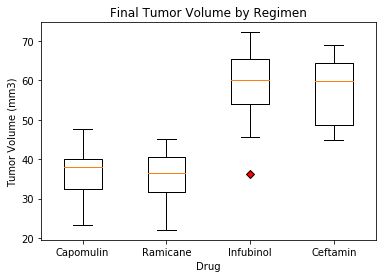

In [358]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_xlabel('Drug')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot( [df_vol_final.loc[df_vol_final["Drug Regimen"]==regimen]["Final Tumor Volume (mm3)"] for regimen in promising_regimen], flierprops=dict(markerfacecolor='r', marker='D'))
ax1.set_xticklabels(promising_regimen)
plt.show()

## Line and scatter plots

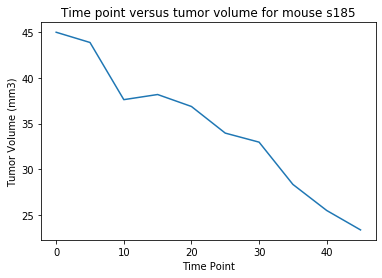

In [353]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_capomulin= df.loc[df["Drug Regimen"]=="Capomulin"]

fig2, ax2 = plt.subplots()
first_mouse=df_capomulin.reset_index()["Mouse ID"][0]
ax2.set_title(f"Time point versus tumor volume for mouse {first_mouse}")
ax2.set_xlabel('Time Point')
ax2.set_ylabel('Tumor Volume (mm3)')
timepoint=df_capomulin['Timepoint'][0:10]
tumorvol=df_capomulin["Tumor Volume (mm3)"][0:10]
ax2=plt.plot(timepoint, tumorvol)
plt.show()



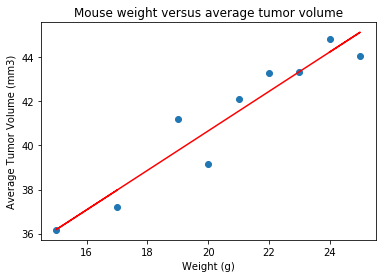

The correlation between mouse weight and average tumor volume is 0.95
The line equation for the linear regression model is y = 0.89x + 22.76


In [354]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df_capomulin= df.loc[df["Drug Regimen"]=="Capomulin"]
weights=df_capomulin["Weight (g)"].unique()
tumorvol=[]
for weight in weights:
    tumorvol.append(df_capomulin.loc[df_capomulin["Weight (g)"]==weight]["Tumor Volume (mm3)"].mean())
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = weights
y_values = tumorvol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse weight versus average tumor volume")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

correlation = st.pearsonr(weights, tumorvol)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
correlation = st.pearsonr(weights, tumorvol)
print(f"The line equation for the linear regression model is {line_eq}")